# Netflix Data Analysis




## Object of this report  : 

* Countries with most content
* Content types and growth in content over years
* Rating types
* Director with most content
* Actors with most content
* Average movie length
* Average number of seasons per TV shows
* Top 15 generes
* Most used words for letter




## Data Gathering

* https://www.kaggle.com/shivamb/netflix-shows/kernels?sortBy=voteCount&group=everyone&pageSize=20&datasetId=434238
* Dataset consits of shows and movies available on Netflix as of 2019



## Data Analysis

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

Read the dataset in a pandas DataFrame

In [2]:
data = pd.read_csv('netflix_titles.csv') 

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Clean Data

In [4]:
data['duration'] = data['duration'].apply(lambda d : d.split()[0])

In [5]:
type(data['duration'].iloc[0])

str

Converting data type of duration into numeric

In [6]:
data['duration'] = pd.to_numeric(data['duration'])

Drop show_id column

In [7]:
data.drop(columns='show_id', inplace = True)

In [8]:
data.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


### Countries with the most content

In [9]:
data['country'].value_counts().head()

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

### Content types and growth of content over years

Growth of content over years

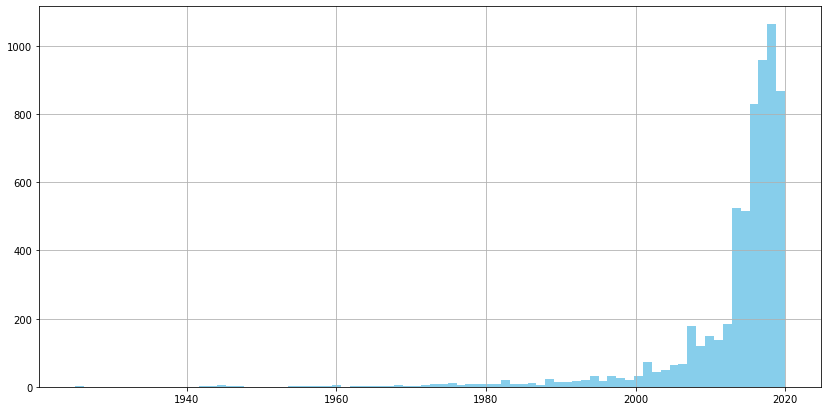

In [10]:
data['release_year'].hist(bins=80, figsize=(14,7), color = 'skyblue')

Content type by country

In [11]:
dataF = data[~data['country'].isna()]
countries = ['United States', 'India', 'United Kingdom', 'Japan']

#Creating country DataFrame

def CountryType(country):
    dataframe = dataF[dataF['country'] == country]
    dataframe = dataframe.groupby(by = 'type').count()
    dataframe.reset_index(inplace = True)
    dataframe = dataframe[['type', 'title']]
    dataframe.columns = ['Type', 'Count']
    return dataframe



UsaType = CountryType('United States')
IndiaType = CountryType('India')
ukType = CountryType('United Kingdom')
JapanType = CountryType('Japan')

Text(0.5, 1.0, 'Content Type BY Country')

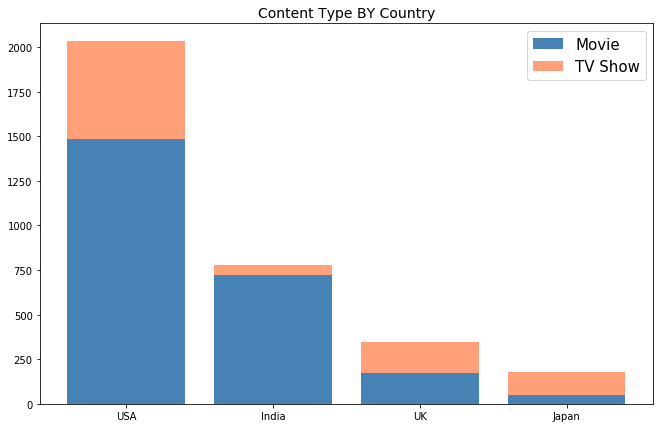

In [12]:
#plot

fig, ax = plt.subplots(figsize = (11, 7))
col1 = 'steelblue'
col2 = 'lightsalmon'

ax.bar( x= 'USA', height = UsaType.iloc[0][1], color = col1)
ax.bar( x= 'USA', height = UsaType.iloc[1][1], bottom = UsaType.iloc[0][1], color = col2)

ax.bar( x = 'India', height = IndiaType.iloc[0][1], color = col1)
ax.bar(x = 'India', height = IndiaType.iloc[1][1], bottom = IndiaType.iloc[0][1], color = col2)

ax.bar( x= 'UK', height = ukType.iloc[0][1], color = col1)
ax.bar( x= 'UK', height = ukType.iloc[1][1], bottom = ukType.iloc[0][1], color = col2)

ax.bar( x= 'Japan', height = JapanType.iloc[0][1], color = col1)
ax.bar( x= 'Japan', height = JapanType.iloc[1][1], bottom = JapanType.iloc[0][1], color = col2)

ax.legend(labels = UsaType['Type'], loc = 'upper right', prop = {'size':15})
ax.set_title('Content Type BY Country', fontsize = 14)



Content types

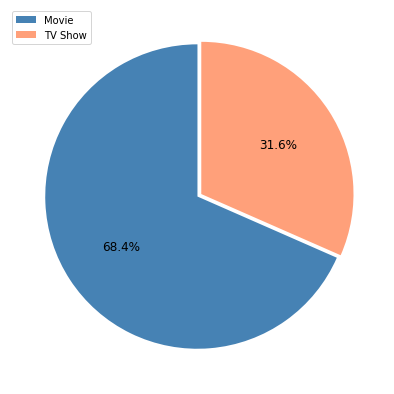

In [13]:
#Create Dataframe
dataFrame = data.groupby(by='type').count()
dataFrame.reset_index(inplace = True)
dataFrame = dataFrame[['type', 'title']]
dataFrame.columns = ['Type', 'Count']      #Changing column name

#Plot
fig,ax = plt.subplots(figsize=(24,7))
color=['steelblue', 'lightsalmon']
ax.pie(x=dataFrame['Count'], startangle=90, explode=(0, 0.03), colors=color, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.legend(labels = dataFrame['Type'], loc = 'upper left')


### Rating types

In [14]:
rtype = data['rating'].value_counts().reset_index()

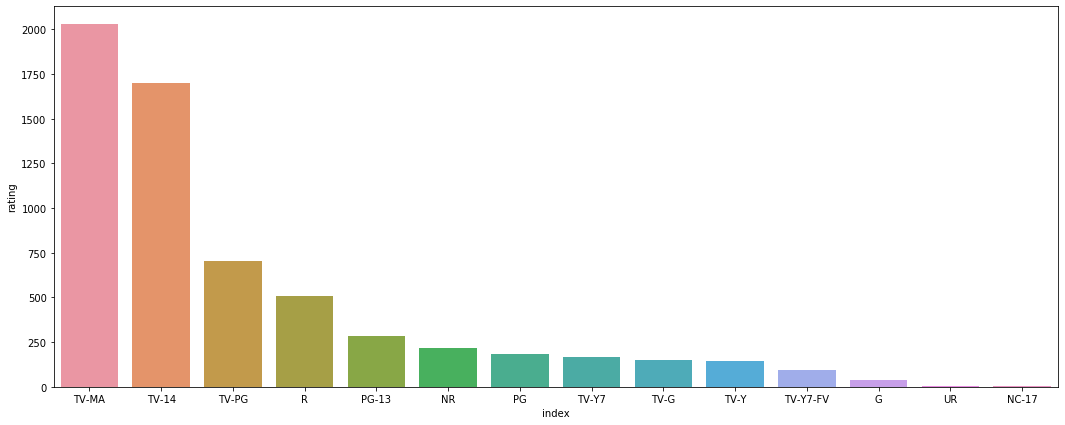

In [15]:
plt.figure(figsize=(18,7))
sns.barplot(x='index', y='rating', data=rtype, )



### Director with most content

In [16]:
#Top 3 worldwide

data['director'].value_counts().head(3) 

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Name: director, dtype: int64

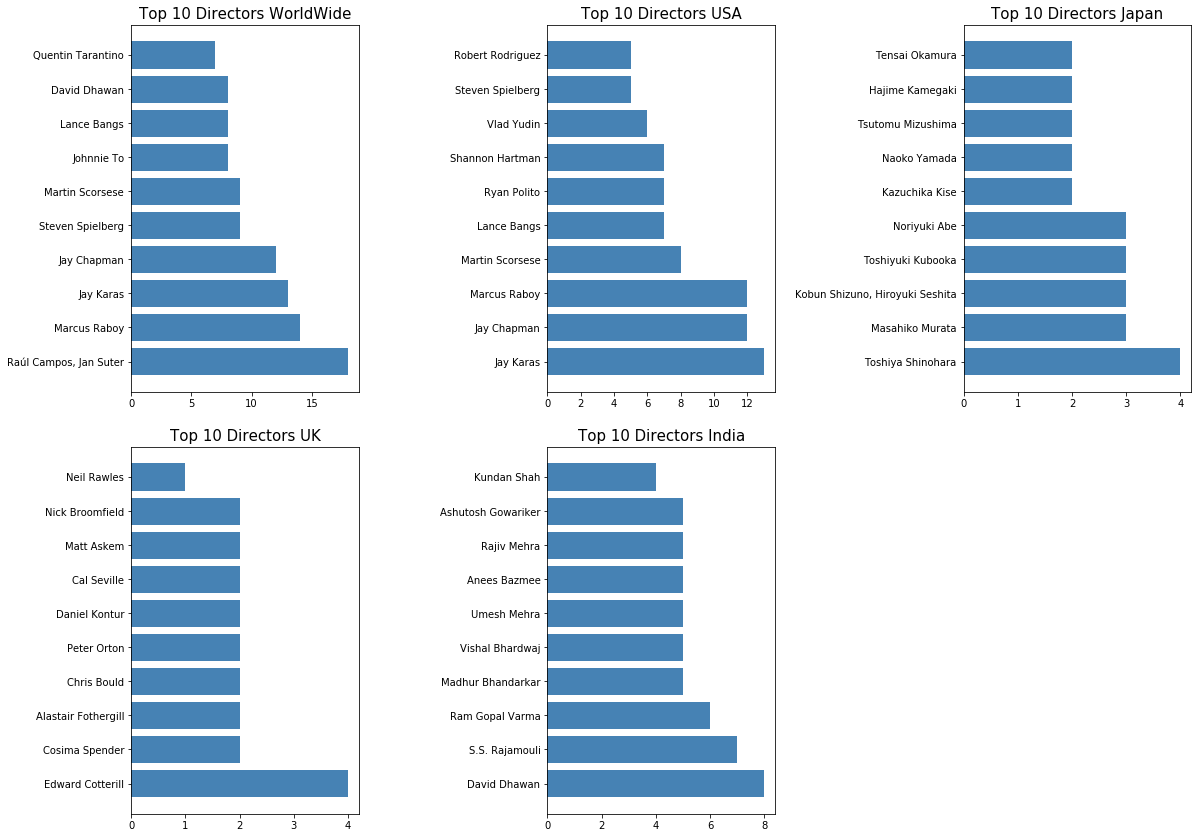

In [17]:
directors = data[~data['director'].isna()]

#Create DataFrame of all countries
allDirector = directors.groupby(by = 'director').count().sort_values('type', ascending=False)
allDirector.reset_index(inplace = True)
allDirector = allDirector[['type', 'director']].head(10)
allDirector.sort_values('type')

#create dataframe of individual country

def byCountry(country):
    ConDirec = directors[directors['country']==country]
    ConDirec = ConDirec.groupby(by ='director').count().sort_values('type', ascending=False)
    ConDirec.reset_index(inplace = True)
    ConDirec = ConDirec[['type', 'director']].head(10)
    ConDirec.sort_values('type')
    return ConDirec
    

    
df_director_usa = byCountry('United States')
df_director_india = byCountry('India')
df_director_uk = byCountry('United Kingdom')
df_director_japan = byCountry('Japan')

#plot

fig, ax = plt.subplots(2, 3, figsize=(17, 12))
#horizontal bar path
ax[0, 0].barh(allDirector['director'], allDirector['type'], color ='steelblue')
ax[0, 0].set_title('Top 10 Directors WorldWide', fontsize = 15)

ax[0, 1].barh(df_director_usa['director'], df_director_usa['type'], color='steelblue')
ax[0, 1].set_title('Top 10 Directors USA', fontsize=15)

ax[1, 0].barh(df_director_uk['director'], df_director_uk['type'], color='steelblue')
ax[1, 0].set_title('Top 10 Directors UK', fontsize=15)

ax[1, 1].barh(df_director_india['director'], df_director_india['type'], color='steelblue')
ax[1, 1].set_title('Top 10 Directors India', fontsize=15)

ax[0, 2].barh(df_director_japan['director'], df_director_japan['type'], color='steelblue')
ax[0, 2].set_title('Top 10 Directors Japan', fontsize=15)

ax[1, 2].axis('off')
fig.tight_layout(pad = 2)

### Actors with most content

In [18]:
df = data[~data['cast'].isna()]

cast = ', '.join(str(v) for v in df['cast']) #string
cast = cast.split(', ') #list
cast_list = []

for x in cast:
    cast_list.append((x.strip(), cast.count(x)))  

cast_list = sorted(cast_list, key = lambda x: x[1], reverse =True)
cast_list =list(dict.fromkeys(cast_list))


#create DF's

#all country
castAll = pd.DataFrame(cast_list, columns = ('actor', 'count'))
castAll =  castAll.head(10)
castAll.sort_values('count', inplace = True)

#countries

def country_cast(country):
    df_country_cast = df[df['country'] == country]
    df_country_cast = ', '.join(str(v) for v in df_country_cast['cast'])
    df_country_cast = df_country_cast.split(', ')
    cast_list1 = []
    for x in df_country_cast:
        cast_list1.append((x.strip(), df_country_cast.count(x)))
    cast_list1 = sorted(cast_list1, key=lambda x: x[1], reverse=True)
    cast_list1 = list(dict.fromkeys(cast_list1))
    cast_list1 = pd.DataFrame(cast_list1, columns=('actor', 'count'))
    cast_list1 = cast_list1.head(10)
    cast_list1.sort_values('count', inplace=True)
    return cast_list1

df_cast_usa = country_cast('United States')
df_cast_india = country_cast('India')
df_cast_uk = country_cast('United Kingdom')
df_cast_japan = country_cast('Japan')
                            
    

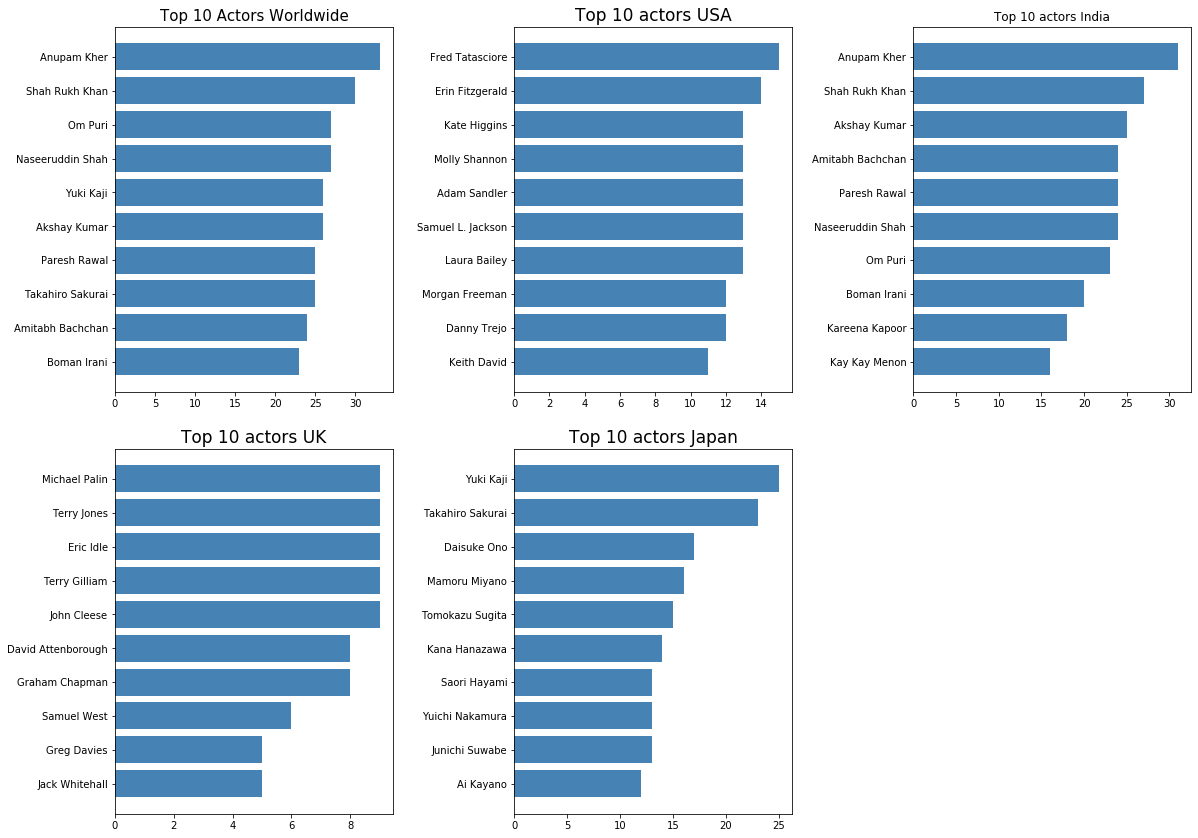

In [19]:
#plot

fig, ax = plt.subplots(2, 3, figsize=(17, 12))

ax[0, 0].barh(castAll['actor'], castAll['count'], color='steelblue')
ax[0, 0].set_title('Top 10 Actors Worldwide', fontsize=15)

#ax[0, 0].barh(castAll['actor'], castAll('count'), color='steelblue')
#ax[0, 0].set_title('Top 10 actors Worldwide', fontsize = 17)

ax[0, 1].barh(df_cast_usa['actor'], df_cast_usa['count'], color='steelblue')
ax[0, 1].set_title('Top 10 actors USA', fontsize=17)

ax[0, 2].barh(df_cast_india['actor'], df_cast_india['count'], color='steelblue')
ax[0, 2].set_title('Top 10 actors India')

ax[1, 0].barh(df_cast_uk['actor'], df_cast_uk['count'], color='steelblue')
ax[1, 0].set_title('Top 10 actors UK', fontsize=17)

ax[1, 1].barh(df_cast_japan['actor'], df_cast_japan['count'], color='steelblue')
ax[1, 1].set_title('Top 10 actors Japan', fontsize=17)

ax[1, 2].axis('off')
fig.tight_layout(pad=2)


### Average Movie length

In [20]:
#create dataframe

dfmovie = data[data['type'] == 'Movie']

#all countries
Allmovie = dfmovie.groupby('duration').count()
Allmovie.reset_index(inplace = True)
Allmovie = Allmovie[['duration', 'type']]
Allmovie.columns = ['duration', 'count']
Allmovie.sort_values('duration', inplace=True)
Allmovie['rel'] = Allmovie['count']/Allmovie['count'].sum()
Allmovie['durcount'] = Allmovie['duration']*Allmovie['count']
avgAllmovie = Allmovie['durcount'].sum()/Allmovie['count'].sum()

#countries

def Country_duration(country):
    dfmovieC = dfmovie[(dfmovie['country']==country) & (dfmovie['type']=='Movie')]
    dfmovieC = dfmovieC.groupby('duration').count()
    dfmovieC.reset_index(inplace = True)
    dfmovieC = dfmovieC[['duration', 'type']]
    dfmovieC.columns = ['duration', 'count']
    dfmovieC.sort_values('duration', inplace = True)
    dfmovieC['rel'] = dfmovieC['count']/dfmovieC['count'].sum()
    dfmovieC['durcount'] = dfmovieC['duration']*dfmovieC['count']
    return dfmovieC

    


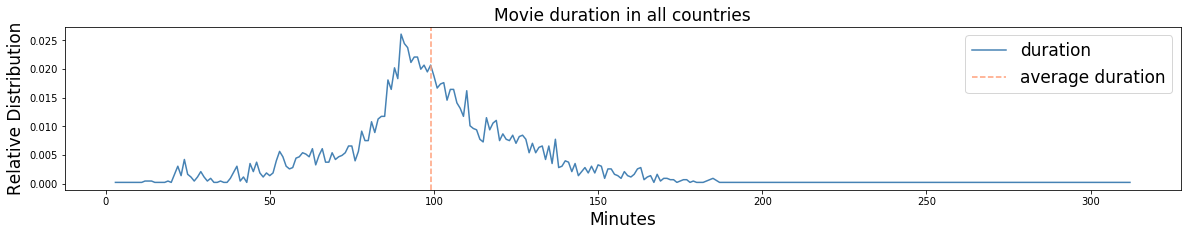

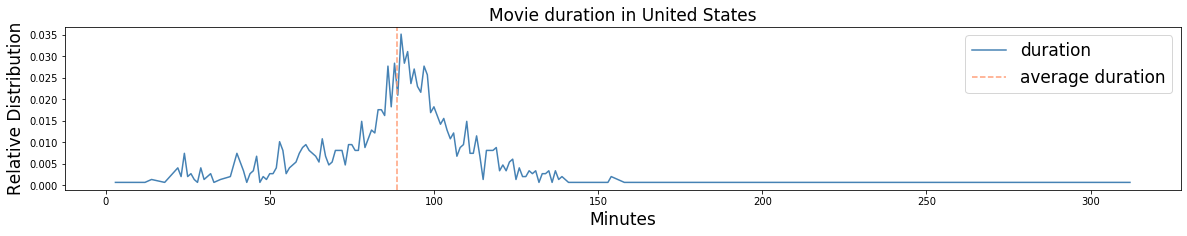

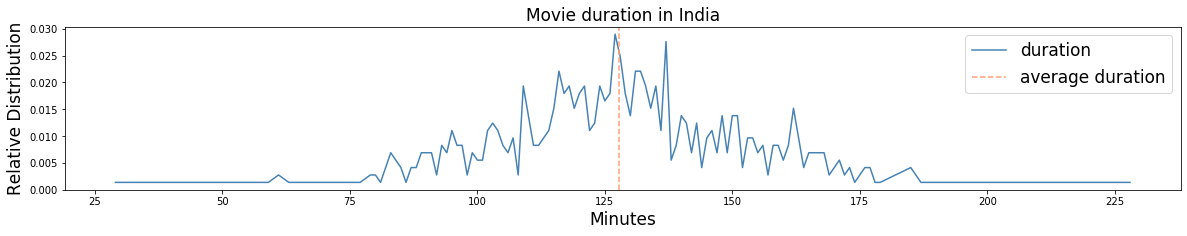

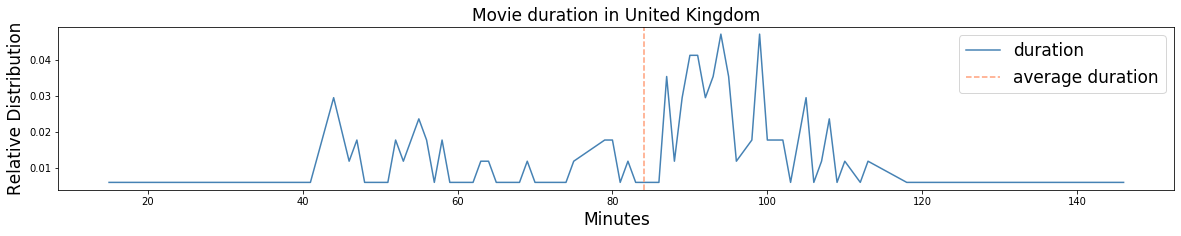

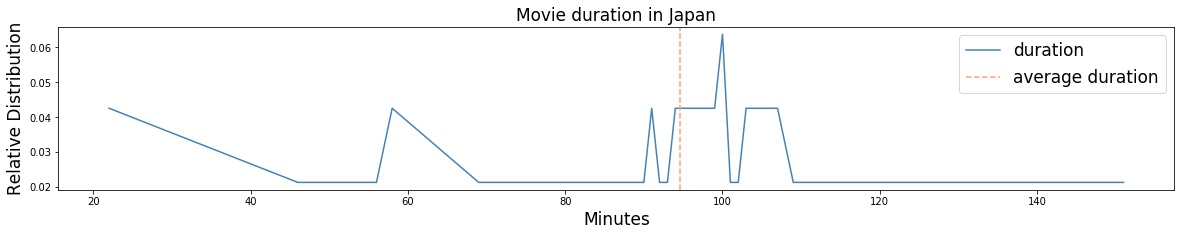

In [21]:
#plot

#all Countries
fig, ax = plt.subplots(figsize = (20, 3))

ax.plot(Allmovie['duration'], Allmovie['rel'], color='steelblue')
plt.axvline(x=avgAllmovie, color='lightsalmon', linestyle='--')  #vertical line across axes

#labels
ax.set_title('Movie duration in all countries', fontsize = 17)
ax.set_ylabel('Relative Distribution', fontsize=17)
ax.set_xlabel('Minutes', fontsize=17)
ax.legend(labels = ['duration', 'average duration'], loc = 'upper right', prop={'size':17})

#countries
for x in range(4):
    for y in range(1):
        dfcount=Country_duration(countries[x])
        fig, ax = plt.subplots(figsize=(20, 3))
        #plot
        ax.plot(dfcount['duration'], dfcount['rel'], color='steelblue')
        ax.set_title('Movie duration in ' +countries[x], fontsize=17)
        ax.set_ylabel('Relative Distribution', fontsize=17)
        ax.set_xlabel('Minutes', fontsize=17)
        avgmovie = dfcount['durcount'].sum()/dfcount['count'].sum()
        plt.axvline(x=avgmovie, color = 'lightsalmon', linestyle='--')
        ax.legend(labels=['duration', 'average duration'],loc='upper right', prop={'size':17})
     

### Average number of seasons per TV show

In [22]:
#CREATE DF's
df_shows = data[data['type'] == 'TV Show']
df_shows['duration'].value_counts()

#all countries
df_seasons_all = df_shows.groupby('duration').count()
df_seasons_all.reset_index(inplace=True)
df_seasons_all = df_seasons_all[['duration', 'type']]
df_seasons_all.columns = ['seasons', 'count']
#countries
def country_seasons(country):
    df_country_seasons = df[(df['country'] == country) & (df['type'] == 'TV Show')]
    df_country_seasons = df_country_seasons.groupby('duration').count()
    df_country_seasons.reset_index(inplace=True)
    df_country_seasons = df_country_seasons[['duration', 'type']]
    df_country_seasons.columns = ['seasons', 'count']
    return df_country_seasons

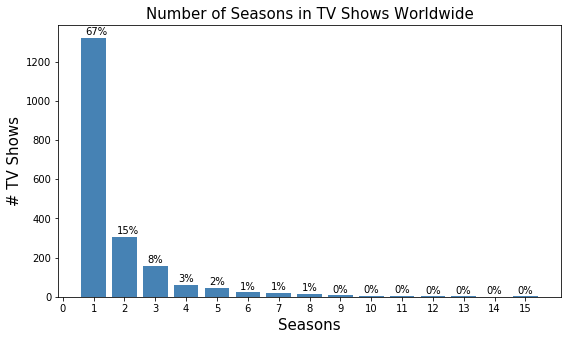

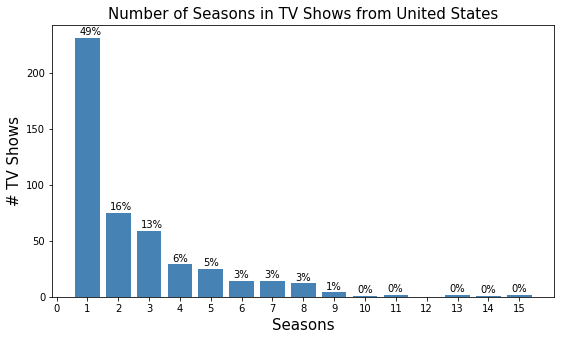

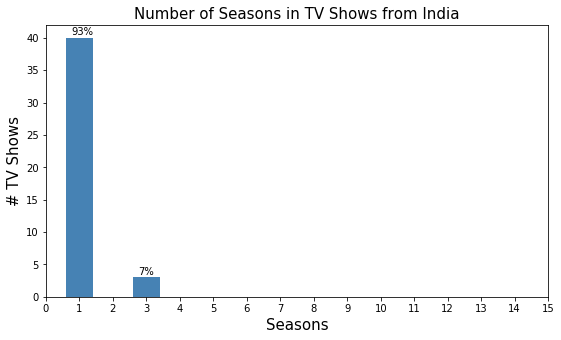

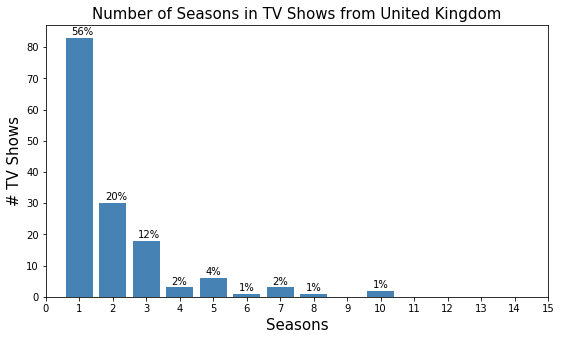

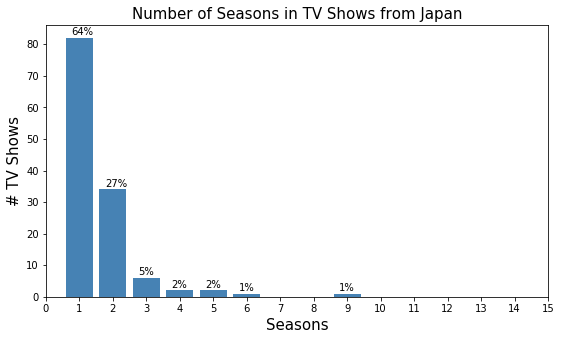

In [23]:
#plot

#all countries
fig11, ax11 = plt.subplots(figsize=(9, 5))
#plot
ax11.bar(df_seasons_all['seasons'], df_seasons_all['count'], color='steelblue')
#annotate values
for a,b in zip(df_seasons_all['seasons'], df_seasons_all['count']): 
    plt.annotate('{:.0f}%'.format(round(int(b)/df_seasons_all['count'].sum()*100)), xy=(a, b), xytext=(-8,3), textcoords='offset points', fontsize = 10)

#labels
plt.xticks(np.arange(0, 16, step=1))
ax11.set_title('Number of Seasons in TV Shows Worldwide', fontsize=15)
ax11.set_ylabel('# TV Shows', fontsize=15)
ax11.set_xlabel('Seasons', fontsize=15)
#countries

for x in range(4):
    for y in range(1):
        df_count_sea = country_seasons(countries[x])
        fig12, ax12 = plt.subplots(figsize=(9, 5))
        #plot
        ax12.bar(df_count_sea['seasons'], df_count_sea['count'], color='steelblue')
        #annotate values
        for a,b in zip(df_count_sea['seasons'], df_count_sea['count']): 
            plt.annotate('{:.0f}%'.format(round(int(b)/df_count_sea['count'].sum()*100)), xy=(a, b), xytext=(-8,3), textcoords='offset points', fontsize = 10)

        #labels
        ax12.set_title('Number of Seasons in TV Shows from '+countries[x], fontsize=15)
        #ax12.set_ylabel('Relative Distribution', fontsize=15)
        ax12.set_xlabel('Seasons', fontsize=15)
        ax12.set_ylabel('# TV Shows', fontsize=15)
        #ax12.legend(labels=['duration', 'average duration'],loc='upper right', prop={'size': 15})
        plt.xticks(np.arange(0, 16, step=1))


### Top 15 Genres

([<matplotlib.axis.XTick at 0x1f975fc6668>,
 <a list of 10 Text xticklabel objects>)

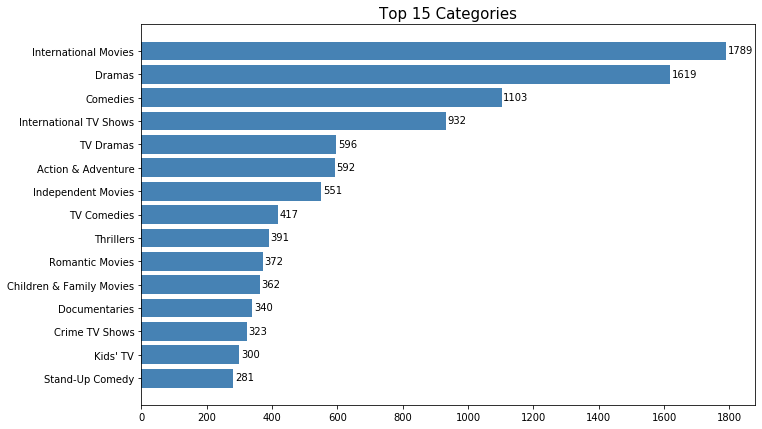

In [24]:
df = df[~df['listed_in'].isna()]
values =', '.join(str(v) for v in df['listed_in']) #string
values = values.split(', ')

list1 = []

for x in values:
    list1.append((x.strip(), values.count(x)))
    
list1 = sorted(list1, key = lambda x: x[1], reverse = True)
list1 = list(dict.fromkeys(list1))

#create df

dfG = pd.DataFrame(list1, columns = ('category', 'count'))
dfG = dfG.head(15)

#plot

fig, ax = plt.subplots(figsize = (11, 7))
ax.barh(dfG['category'], dfG['count'], color='steelblue')

#Sort bar ASC
plt.gca().invert_yaxis()

#annotate values
for i, v in enumerate(dfG['count']):
    ax.text(v+5, i+0.1, str(v))
    
#labels
ax.set_title('Top 15 Categories', fontsize =15)
plt.xticks(np.arange(0, 2000, step = 200))


### Most used words for titles

(-0.5, 1919.5, 1079.5, -0.5)

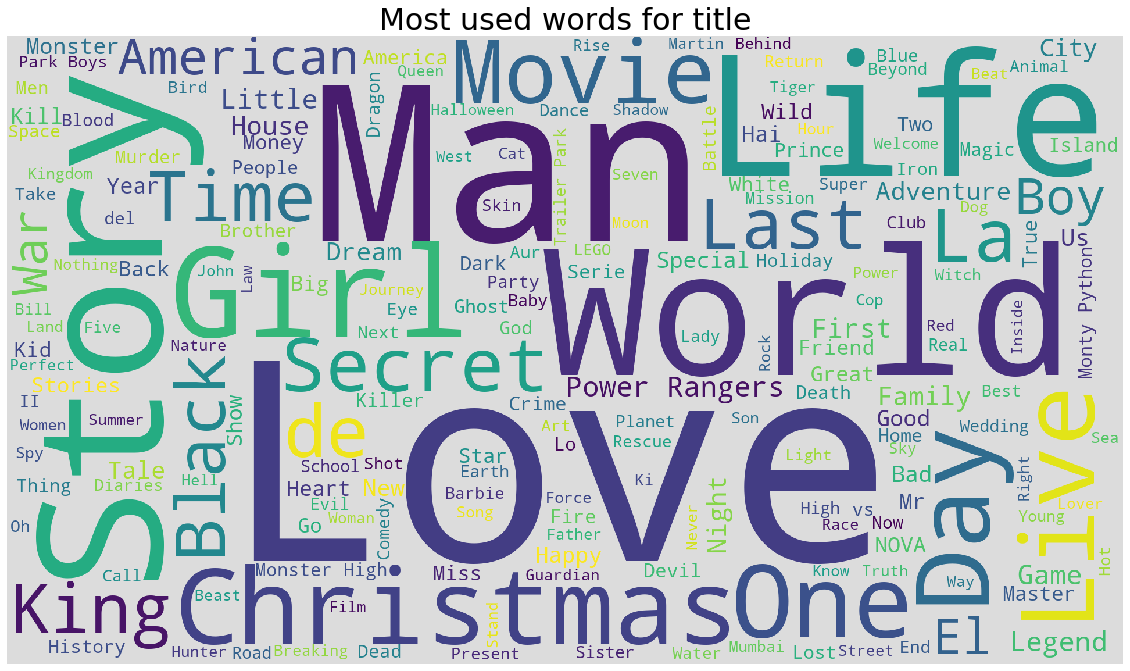

In [25]:
#create wordcloud
from wordcloud import WordCloud
words = ' '.join(str(v) for v in data['title'])
wordcloud = WordCloud(max_words = 200, width = 1920, height = 1080, background_color = 'gainsboro').generate(words)

#plot

fig, ax = plt.subplots(figsize =(20, 15))
ax.imshow(wordcloud, interpolation = 'None')

#labels

ax.set_title('Most used words for title', fontsize = 30)
ax.axis('off')


### Result

* The US has by far the most content, followed by India with less than half the amount.
* There are about twice as many movies than TV shows on Netflix worldwide.
* The US has relatively more content suitable for younger viewers and less adult rated content compared to other countries.
* India has the highest ratio on adult-rated content.
* The biggest yearly content growth was in 2017.
* The global average is at around 100 minutes.